In [27]:
# Import Dependencies
import pandas as pd
import numpy as np  
import csv 
import datetime as dt

#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#To plot the graph embedded in the notebook
%matplotlib inline

# Machine Learning dependencies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# PREDICT 2 BDR HOUSE PRICES IN NORTH CAROLINA

In [28]:
# Read in the dataset for 1 bedroom house price prediction
nc_2bdr_final = pd.read_csv('./static/data/rw_nc_2bdr_final.csv')
nc_2bdr_final

,city,zipcode,avg_house_price,number_of_schools,population,poverty_count,median_household_income,poverty_rate
0,Aberdeen,28315,99995.515789,4,13700.0,2826.0,51725.0,20.627737
1,Advance,27006,132251.410811,2,14555.0,932.0,78095.0,6.403298
2,Albemarle,28001,58202.006803,8,26601.0,5208.0,45121.0,19.578211
3,Angier,27501,101196.766667,5,21299.0,2601.0,56338.0,12.211841
4,Apex,27502,155699.619863,7,40280.0,2248.0,110513.0,5.580933
...,...,...,...,...,...,...,...,...
491,Wrightsville Beach,28480,603578.373626,1,2536.0,216.0,83417.0,8.517350
492,Yadkinville,27055,86084.994565,4,14131.0,1855.0,44574.0,13.127167
493,Youngsville,27596,139581.902703,3,18359.0,1624.0,70535.0,8.845798
494,Zebulon,27597,103068.200692,5,23538.0,2995.0,58514.0,12.724106


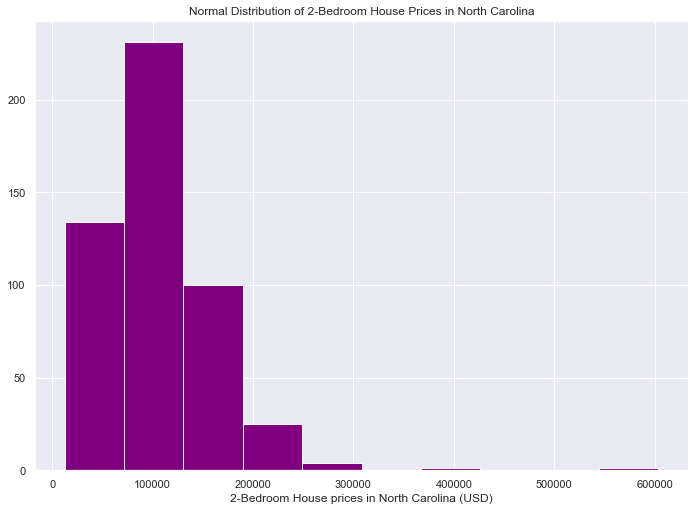

In [29]:
# Check distribution of house prices
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(nc_2bdr_final['avg_house_price'], bins=10, color="purple")
plt.xlabel("2-Bedroom House prices in North Carolina (USD)")
plt.title("Normal Distribution of 2-Bedroom House Prices in North Carolina")

plt.savefig('./static/images/PriceDistribution_2bdr.png')
plt.show()

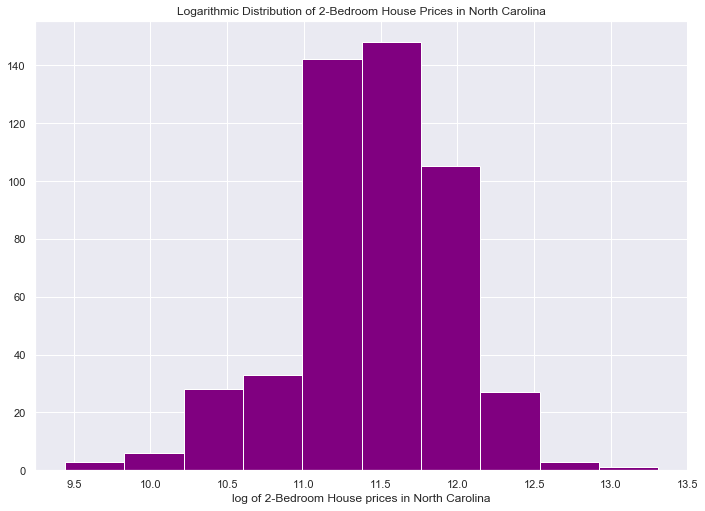

In [30]:
#Take logarithm of the target variable to normalize the distribution & make it more symmetrical
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(np.log(nc_2bdr_final['avg_house_price']), bins=10, color="purple")
plt.xlabel("log of 2-Bedroom House prices in North Carolina")
plt.title("Logarithmic Distribution of 2-Bedroom House Prices in North Carolina")
plt.savefig('./static/images/LogPriceDistribution_2bdr.png')
plt.show()

In [31]:
# Calculate measures:
print(f"Skew (Normal Distribution (2BDR)) is:", nc_2bdr_final['avg_house_price'].skew())
print(f"Kurtosis (Normal Distribution (2BDR)): %f" % nc_2bdr_final['avg_house_price'].kurt())

print(f"Skew (Logarithmic Distribution (2BDR)) is:", np.log(nc_2bdr_final['avg_house_price']).skew())
print(f"Kurtosis (Logarithmic Distribution (2BDR)): %f" % np.log(nc_2bdr_final['avg_house_price']).kurt())

Skew (Normal Distribution (2BDR)) is: 2.372960002323413
Kurtosis (Normal Distribution (2BDR)): 15.220410
Skew (Logarithmic Distribution (2BDR)) is: -0.4187237433574186
Kurtosis (Logarithmic Distribution (2BDR)): 0.913975


In [32]:
#Creating new df to store log values of house Price
nc_2bdr_log = nc_2bdr_final
nc_2bdr_log.avg_house_price = np.log(nc_2bdr_log.avg_house_price)
nc_2bdr_log

,city,zipcode,avg_house_price,number_of_schools,population,poverty_count,median_household_income,poverty_rate
0,Aberdeen,28315,11.512881,4,13700.0,2826.0,51725.0,20.627737
1,Advance,27006,11.792460,2,14555.0,932.0,78095.0,6.403298
2,Albemarle,28001,10.971675,8,26601.0,5208.0,45121.0,19.578211
3,Angier,27501,11.524822,5,21299.0,2601.0,56338.0,12.211841
4,Apex,27502,11.955684,7,40280.0,2248.0,110513.0,5.580933
...,...,...,...,...,...,...,...,...
491,Wrightsville Beach,28480,13.310631,1,2536.0,216.0,83417.0,8.517350
492,Yadkinville,27055,11.363090,4,14131.0,1855.0,44574.0,13.127167
493,Youngsville,27596,11.846407,3,18359.0,1624.0,70535.0,8.845798
494,Zebulon,27597,11.543146,5,23538.0,2995.0,58514.0,12.724106


In [33]:
# Created a df without price to check coorelation among features
nc_2bdr_log_explore = nc_2bdr_log[["city","zipcode", "number_of_schools", "population", "poverty_count", "median_household_income", "poverty_rate"]]
nc_2bdr_log_explore

,city,zipcode,number_of_schools,population,poverty_count,median_household_income,poverty_rate
0,Aberdeen,28315,4,13700.0,2826.0,51725.0,20.627737
1,Advance,27006,2,14555.0,932.0,78095.0,6.403298
2,Albemarle,28001,8,26601.0,5208.0,45121.0,19.578211
3,Angier,27501,5,21299.0,2601.0,56338.0,12.211841
4,Apex,27502,7,40280.0,2248.0,110513.0,5.580933
...,...,...,...,...,...,...,...
491,Wrightsville Beach,28480,1,2536.0,216.0,83417.0,8.517350
492,Yadkinville,27055,4,14131.0,1855.0,44574.0,13.127167
493,Youngsville,27596,3,18359.0,1624.0,70535.0,8.845798
494,Zebulon,27597,5,23538.0,2995.0,58514.0,12.724106


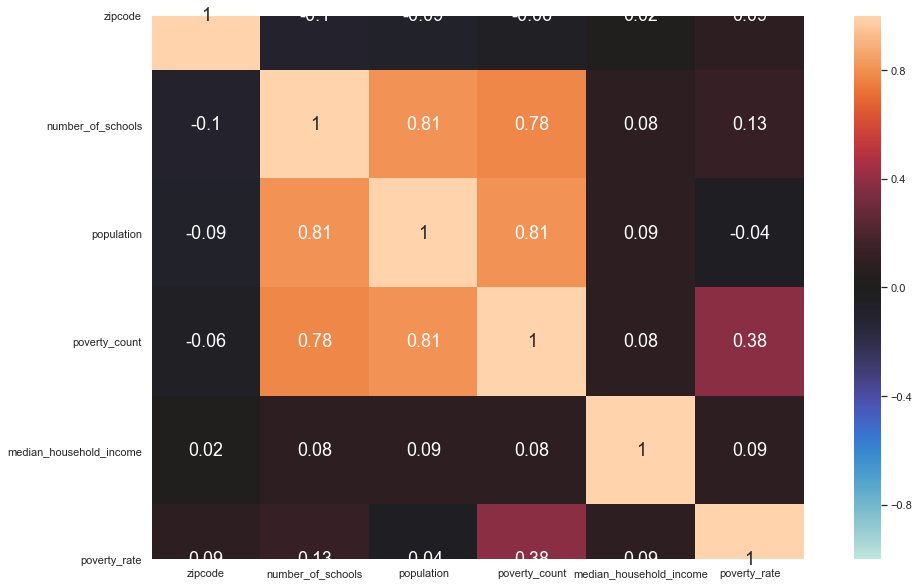

In [34]:
#check coorelation among features using seaborn library
nc_2bdr_log_corr_matrix = nc_2bdr_log_explore.corr().round(2)

fig_dims = (18, 10)
fig, ax = plt.subplots(figsize=fig_dims)

sns.heatmap(data=nc_2bdr_log_corr_matrix, 
            annot=True, 
            annot_kws={"size": 18},
            vmin=-1, vmax=1, center= 0, 
            square=True,
            ax=ax,)

# Save Plot
plt.savefig('./static/images/LogCorrelation Matrix_2bdr.png')


# The correlation coefficient ranges from -1 to 1. 
# If the value is close to 1, the variables have a strong positive correlation  
# When it is close to -1, the variables have a strong negative correlation

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

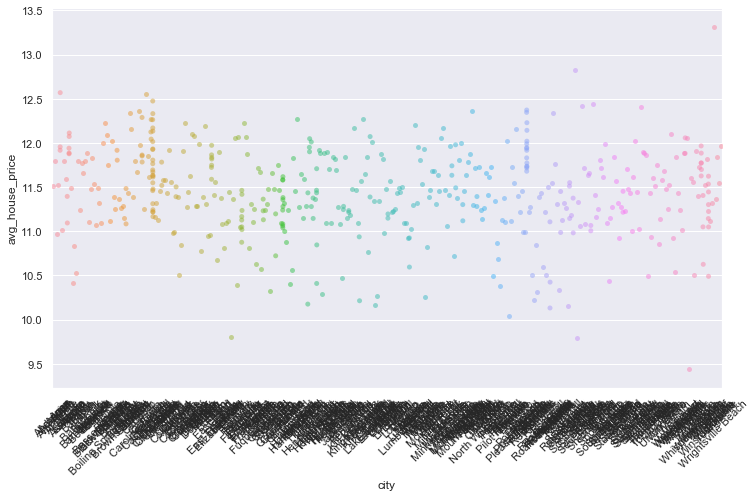

In [35]:
plt.figure(figsize=(12,7))
sns.stripplot(x = nc_2bdr_final["city"], 
              y = nc_2bdr_final["avg_house_price"],
              order = np.sort(nc_2bdr_final["city"].unique()),
              jitter=0.1, alpha=0.5)
 
plt.xticks(rotation=45)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

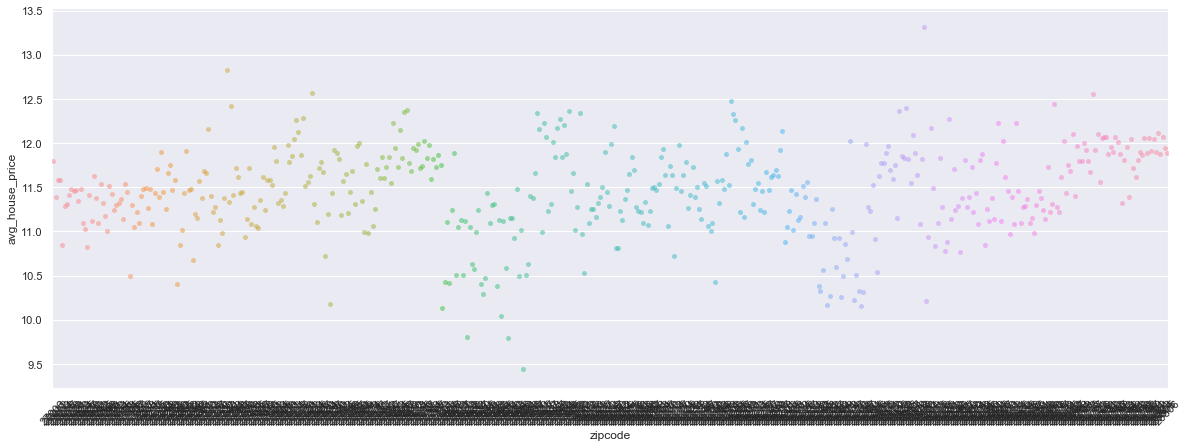

In [36]:
plt.figure(figsize=(20,7))
sns.stripplot(x = nc_2bdr_final["zipcode"], 
              y = nc_2bdr_final["avg_house_price"],
              order = np.sort(nc_2bdr_final["zipcode"].unique()),
              jitter=0.1, alpha=0.5)
 
plt.xticks(rotation=45)

In [37]:
# OneHot encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
var_mod = ["city", "zipcode"]
for i in var_mod:
    nc_2bdr_log[i] = le.fit_transform(nc_2bdr_log[i])
#Dummy Variables:
nc_2bdr_log_final = pd.get_dummies(nc_2bdr_log, columns = var_mod)
nc_2bdr_log_final

,avg_house_price,number_of_schools,population,poverty_count,median_household_income,poverty_rate,city_0,city_1,city_2,city_3,...,zipcode_486,zipcode_487,zipcode_488,zipcode_489,zipcode_490,zipcode_491,zipcode_492,zipcode_493,zipcode_494,zipcode_495
0,11.512881,4,13700.0,2826.0,51725.0,20.627737,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11.792460,2,14555.0,932.0,78095.0,6.403298,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10.971675,8,26601.0,5208.0,45121.0,19.578211,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,11.524822,5,21299.0,2601.0,56338.0,12.211841,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,11.955684,7,40280.0,2248.0,110513.0,5.580933,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,13.310631,1,2536.0,216.0,83417.0,8.517350,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
492,11.363090,4,14131.0,1855.0,44574.0,13.127167,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
493,11.846407,3,18359.0,1624.0,70535.0,8.845798,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
494,11.543146,5,23538.0,2995.0,58514.0,12.724106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# Define dependent and independent variables
X_2bdr = nc_2bdr_log_final.drop('avg_house_price', axis = 1) # Drop unnecessary columns
y_2bdr = nc_2bdr_log_final["avg_house_price"].values.reshape(-1,1)

In [39]:
# Split data into train and test data
from sklearn.model_selection import train_test_split
X_train_2bdr, X_test_2bdr, y_train_2bdr, y_test_2bdr = train_test_split(X_2bdr, y_2bdr, random_state=42)

In [40]:
# Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model_2bdr = LinearRegression()

In [41]:
# Fit the model to the training data and calculate the scores for the training and testing data
model_2bdr.fit(X_train_2bdr, y_train_2bdr)
training_score_2bdr = model_2bdr.score(X_train_2bdr, y_train_2bdr)
testing_score_2bdr = model_2bdr.score(X_test_2bdr, y_test_2bdr)

# Print Scores
print(f"1 BDR Training Score: {training_score_2bdr}")
print(f"1 BDR Testing Score: {testing_score_2bdr}")

1 BDR Training Score: 0.9999999999999707
1 BDR Testing Score: 0.37891881726088517


2 BDR Mean Squared Error (MSE): 0.13571322978310355
2 BDR R-squared (R2 ): 0.37891881726088517


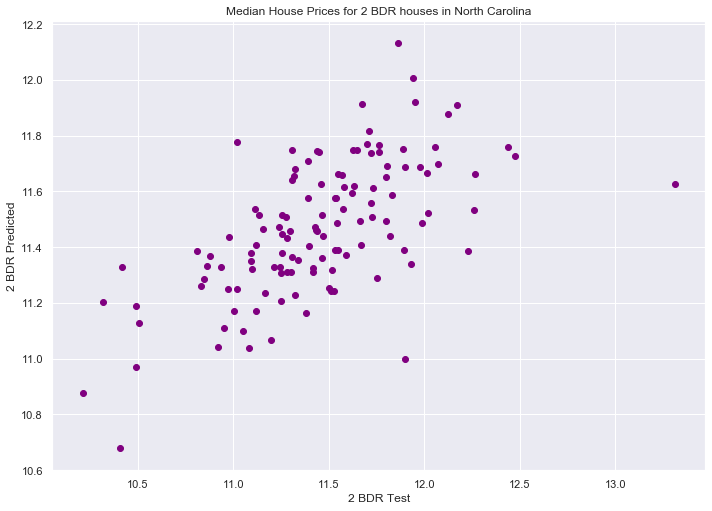

In [42]:
# Calculate the mean_squared_error and the r-squared value for the testing data
from sklearn.metrics import mean_squared_error, r2_score

# Use the model to make predictions
predicted_2bdr = model_2bdr.predict(X_test_2bdr)

# Score the predictions with mse and r2
mse_2bdr = mean_squared_error(y_test_2bdr, predicted_2bdr)
r2_2bdr = r2_score(y_test_2bdr, predicted_2bdr)
print(f"2 BDR Mean Squared Error (MSE): {mse_2bdr}")
print(f"2 BDR R-squared (R2 ): {r2_2bdr}")

#Plot the Predicted house prices
plt.scatter(y_test_2bdr,predicted_2bdr, c="purple")

# Label plot
plt.xlabel('2 BDR Test')
plt.ylabel('2 BDR Predicted')

plt.title('Median House Prices for 2 BDR houses in North Carolina')

# Save Plot
plt.savefig('./static/images/LogLinearRegression_2bdr.png')

# Show plot
plt.show()

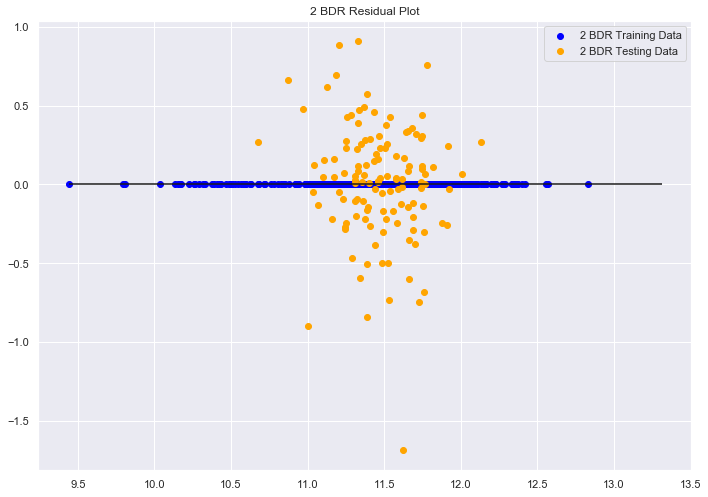

In [43]:
plt.scatter(model_2bdr.predict(X_train_2bdr), model_2bdr.predict(X_train_2bdr) - y_train_2bdr, c="blue", label="2 BDR Training Data")

plt.scatter(model_2bdr.predict(X_test_2bdr), model_2bdr.predict(X_test_2bdr) - y_test_2bdr, c="orange", label="2 BDR Testing Data")

plt.legend()

plt.hlines(y=0, xmin=y_2bdr.min(), xmax=y_2bdr.max())

plt.title("2 BDR Residual Plot")
plt.savefig('./static/images/LogResidual Plot_2bdr.png')